**Skin Lesion Classification of unbalanced unsegmented images using EfficientNetB2**

**Loading files from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Importing the required libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB2
import cv2  
from google.colab.patches import cv2_imshow

In [ ]:
import pathlib
root_path = "/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/training/Processed"
data_dir = pathlib.Path(root_path)

**Splitting the data into training and validation**

In [ ]:
batch_size=64

In [ ]:
img_height,img_width=256,256
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25331 files belonging to 8 classes.
Using 20265 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25331 files belonging to 8 classes.
Using 5066 files for validation.


In [ ]:
classnames = train_ds.class_names
classnames

['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']

**Visualizing the data**

In [ ]:
import cv2  
from google.colab.patches import cv2_imshow

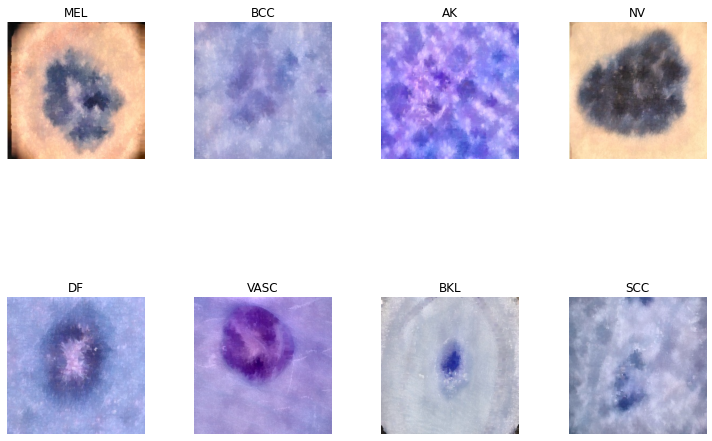

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,4,figsize=[10,10])

ax[0, 0].title.set_text('MEL')
ax[0, 1].title.set_text('BCC')
ax[0, 2].title.set_text('AK')
ax[0, 3].title.set_text('NV')

img = cv2.imread('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/training/Processed/MEL/ISIC_0000002.jpg')
ax[0, 0].imshow(img)
ax[0, 0].axis("off")
img = cv2.imread('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/training/Processed/BCC/ISIC_0024331.jpg')
ax[0, 1].imshow(img)
ax[0, 1].axis("off")
img = cv2.imread('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/training/Processed/AK/ISIC_0024468.jpg')
ax[0, 2].imshow(img)
ax[0, 2].axis("off")
img = cv2.imread('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/training/Processed/NV/ISIC_0000000.jpg')
ax[0, 3].imshow(img)
ax[0, 3].axis("off")

ax[1, 0].title.set_text('DF')
ax[1, 1].title.set_text('VASC')
ax[1, 2].title.set_text('BKL')
ax[1, 3].title.set_text('SCC')


img = cv2.imread('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/training/Processed/DF/ISIC_0024318.jpg')
ax[1, 0].imshow(img)
ax[1, 0].axis("off")
img = cv2.imread('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/training/Processed/VASC/ISIC_0024370.jpg')
ax[1, 1].imshow(img)
ax[1, 1].axis("off")
img = cv2.imread('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/training/Processed/BKL/ISIC_0012103_downsampled.jpg')
ax[1, 2].imshow(img)
ax[1, 2].axis("off")
img = cv2.imread('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/training/Processed/SCC/ISIC_0024329.jpg')
ax[1, 3].imshow(img)
ax[1, 3].axis("off")

fig.tight_layout(h_pad=-4, w_pad=5)


**Training the model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
inputs = layers.Input(shape=(256, 256, 3))
x = img_augmentation(inputs)  
model = EfficientNetB2(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# take a tensor and compute the average value of all values across the entire matrix for each of the input channels.
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
# 
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(8, activation="softmax", name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

31801344/31790344 [==============================] - 0s 0us/step


In [ ]:
epochs = 20
hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
317/317 [==============================] - 80s 211ms/step - loss: 1.7594 - accuracy: 0.5486 - val_loss: 1.2663 - val_accuracy: 0.5963
Epoch 2/20
317/317 [==============================] - 65s 202ms/step - loss: 1.2404 - accuracy: 0.5895 - val_loss: 1.1558 - val_accuracy: 0.6042
Epoch 3/20
317/317 [==============================] - 65s 203ms/step - loss: 1.0941 - accuracy: 0.6094 - val_loss: 1.0496 - val_accuracy: 0.6325
Epoch 4/20
317/317 [==============================] - 65s 202ms/step - loss: 1.0575 - accuracy: 0.6154 - val_loss: 1.0415 - val_accuracy: 0.6376
Epoch 5/20
317/317 [==============================] - 65s 203ms/step - loss: 1.0594 - accuracy: 0.6187 - val_loss: 1.0616 - val_accuracy: 0.6285
Epoch 6/20
317/317 [==============================] - 65s 202ms/step - loss: 1.0583 - accuracy: 0.6135 - val_loss: 1.0379 - val_accuracy: 0.6386
Epoch 7/20
317/317 [==============================] - 65s 203ms/step - loss: 1.0559 - accuracy: 0.6139 - val_loss: 1.0434 - val_ac

In [ ]:
model.save('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/efficientnet_model.h5')
print("EfficientNet Model saved")

EfficientNet Model saved


In [ ]:
model.trainable = True
epochs=20
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
317/317 [==============================] - 296s 877ms/step - loss: 1.0740 - accuracy: 0.6185 - val_loss: 0.9956 - val_accuracy: 0.6546
Epoch 2/20
317/317 [==============================] - 274s 863ms/step - loss: 0.8866 - accuracy: 0.6731 - val_loss: 0.8419 - val_accuracy: 0.6944
Epoch 3/20
317/317 [==============================] - 274s 862ms/step - loss: 0.7945 - accuracy: 0.7089 - val_loss: 0.8073 - val_accuracy: 0.7083
Epoch 4/20
317/317 [==============================] - 274s 862ms/step - loss: 0.7366 - accuracy: 0.7283 - val_loss: 0.7555 - val_accuracy: 0.7319
Epoch 5/20
317/317 [==============================] - 274s 862ms/step - loss: 0.6778 - accuracy: 0.7510 - val_loss: 0.7255 - val_accuracy: 0.7377
Epoch 6/20
317/317 [==============================] - 275s 865ms/step - loss: 0.6318 - accuracy: 0.7646 - val_loss: 0.7086 - val_accuracy: 0.7491
Epoch 7/20
317/317 [==============================] - 274s 862ms/step - loss: 0.5859 - accuracy: 0.7844 - val_loss: 0.6752 -

In [ ]:
model.save('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/efficientnet_model1.h5')
print("EfficientNet Model saved")

EfficientNet Model saved


In [ ]:
#50 epochs

epochs=10
hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/10
317/317 [==============================] - 407s 1s/step - loss: 0.0498 - accuracy: 0.9836 - val_loss: 1.1689 - val_accuracy: 0.7916
Epoch 2/10
317/317 [==============================] - 394s 1s/step - loss: 0.0426 - accuracy: 0.9852 - val_loss: 1.1776 - val_accuracy: 0.7989
Epoch 3/10
317/317 [==============================] - 394s 1s/step - loss: 0.0459 - accuracy: 0.9845 - val_loss: 1.1904 - val_accuracy: 0.7957
Epoch 4/10
317/317 [==============================] - 393s 1s/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 1.0764 - val_accuracy: 0.8068
Epoch 5/10
317/317 [==============================] - 392s 1s/step - loss: 0.0389 - accuracy: 0.9866 - val_loss: 1.1465 - val_accuracy: 0.8066
Epoch 6/10
317/317 [==============================] - 392s 1s/step - loss: 0.0418 - accuracy: 0.9854 - val_loss: 1.1923 - val_accuracy: 0.7914
Epoch 7/10
317/317 [==============================] - 394s 1s/step - loss: 0.0485 - accuracy: 0.9829 - val_loss: 1.1869 - val_accuracy: 0.8000

In [ ]:
model.save('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/50_efficientnet_model1.h5')
print("EfficientNet Model saved")

EfficientNet Model saved


**Validating the model**

In [ ]:
from keras.models import load_model
model=load_model('/content/gdrive/MyDrive/ISIC_DATASETS/ISIC_Datasets/Classification/50_efficientnet_model1.h5')

In [ ]:
y_val = np.zeros(5066, dtype=object)
x_val = np.zeros([5066, 256, 256, 3])
i=0
j=0

for x,y in val_ds:
  for k in x:
    x_val[j, :,:] = k
    j+=1
  for p in y:
    y_val[i] = p
    i+=1

y_label = np.empty(5066, dtype=object)
for i in range(len(y_val)):
  y_label[i] = np.array(y_val[i])

In [ ]:
pred=model.predict(x_val,batch_size=64, verbose=1)

80/80 [==============================] - 68s 823ms/step


In [ ]:
y_true=[]
for i in range(len(y_label)):
  y_true.append(classnames[y_label[i]])

In [ ]:
output_class=[]
for i in range(len(pred)):
  output_class.append(classnames[np.argmax(pred[i])])

**Displaying few predicted samples**

In [ ]:
for i in range(50):
  print("\nImage : ", i+1)
  cv2_imshow(x_val[i])
  print("The actual class is", y_true[i])
  print("The predicted class is", output_class[i]) 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Crct_Counter={'AK':0,'MEL':0,'BCC':0,'NV':0,'BKL':0,'DF':0,'VASC':0,'SCC':0}
Total_Counter={'AK':0,'MEL':0,'BCC':0,'NV':0,'BKL':0,'DF':0,'VASC':0,'SCC':0}
for i in range(len(pred)):
  Total_Counter[y_true[i]]+=1
  if(y_true[i]==output_class[i]):
    Crct_Counter[y_true[i]]+=1

**Displaying class-wise accuracies**

In [ ]:
print("Class_name \t\t Crct_pred \t\t  tot_images \t\t Accuracy")
print("AK\t\t\t",Crct_Counter['AK'],"\t\t\t ",Total_Counter['AK'],"\t\t\t",round(Crct_Counter['AK']/Total_Counter['AK'],2))
print("MEL\t\t\t",Crct_Counter['MEL'],"\t\t\t ",Total_Counter['MEL'],"\t\t\t",round(Crct_Counter['MEL']/Total_Counter['MEL'],2))
print("BCC\t\t\t",Crct_Counter['BCC'],"\t\t\t ",Total_Counter['BCC'],"\t\t\t",round(Crct_Counter['BCC']/Total_Counter['BCC'],2))
print("NV\t\t\t",Crct_Counter['NV'],"\t\t\t ",Total_Counter['NV'],"\t\t\t",round(Crct_Counter['NV']/Total_Counter['NV'],2))
print("BKL\t\t\t",Crct_Counter['BKL'],"\t\t\t ",Total_Counter['BKL'],"\t\t\t",round(Crct_Counter['BKL']/Total_Counter['BKL'],2))
print("DF\t\t\t",Crct_Counter['DF'],"\t\t\t ",Total_Counter['DF'],"\t\t\t",round(Crct_Counter['DF']/Total_Counter['DF'],2))
print("VASC\t\t\t",Crct_Counter['VASC'],"\t\t\t ",Total_Counter['VASC'],"\t\t\t",round(Crct_Counter['VASC']/Total_Counter['VASC'],2))
print("SCC\t\t\t",Crct_Counter['SCC'],"\t\t\t ",Total_Counter['SCC'],"\t\t\t",round(Crct_Counter['SCC']/Total_Counter['SCC'],2))


Class_name 		 Crct_pred 		  tot_images 		 Accuracy
AK			 85 			  148 			 0.57
MEL			 538 			  897 			 0.6
BCC			 569 			  659 			 0.86
NV			 2382 			  2626 			 0.91
BKL			 355 			  519 			 0.68
DF			 25 			  44 			 0.57
VASC			 38 			  56 			 0.68
SCC			 66 			  117 			 0.56


**Displaying the classification report**

In [ ]:
from sklearn.metrics import classification_report
target_names = ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']
print(classification_report(y_true, output_class, target_names=target_names))

              precision    recall  f1-score   support

          AK       0.61      0.57      0.59       148
         BCC       0.73      0.86      0.79       659
         BKL       0.62      0.68      0.65       519
          DF       0.86      0.57      0.68        44
         MEL       0.79      0.60      0.68       897
          NV       0.87      0.91      0.89      2626
         SCC       0.75      0.56      0.64       117
        VASC       0.88      0.68      0.77        56

    accuracy                           0.80      5066
   macro avg       0.77      0.68      0.71      5066
weighted avg       0.80      0.80      0.80      5066



**Displaying the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, output_class, labels=target_names) 

array([[  85,   26,   20,    1,    5,    7,    4,    0],
       [  17,  569,   16,    1,   11,   33,   10,    2],
       [  16,   36,  355,    0,   33,   75,    3,    1],
       [   0,   10,    0,   25,    2,    4,    2,    1],
       [  13,   42,   72,    0,  538,  230,    2,    0],
       [   2,   58,   99,    2,   81, 2382,    1,    1],
       [   7,   28,    8,    0,    3,    5,   66,    0],
       [   0,    6,    1,    0,    6,    5,    0,   38]])